In [1]:
"""
    Experimentation with RFC on a datset of MRI covid/non-covid images.
    
    Created: 11/25/2020
    Author(s): Akarsh V Hebbar (ah67805)

"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import *

from DataHandler import dataHandler

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import FastICA

In [2]:
dh = dataHandler() # data handler object. See DataHandler.py for more information.

# ALTER HYPERPARAMETERS HERE
BATCH_SIZE = 16




In [3]:
dataset = dh.get_all_data_labeled(shuffle=True)

In [4]:
# check that all data is in place
assert len(dh.get_non_covid_data_fp()) == 397 and len(dh.get_covid_data_fp()) == 349 and len(dh.get_all_data_labeled()) == (397 + 349)

In [5]:
datapoint = dataset[0] # get some datapoint from the dataset
random_img = cv2.imread(datapoint[0])

Label:  1.0
filepath:  C:\Users\user\COVID-19-CT-image-analysis-CSCI_8955-main\data\CT_COVID\2020.03.21.20040691-p18-67-3.png
image dimensions:  (296, 410, 3)
image datatype:  uint8
image max:  255
image min


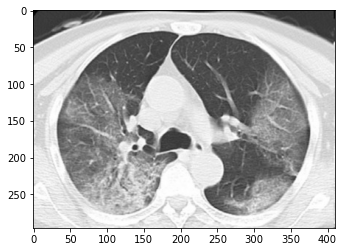

In [6]:
print("Label: ", datapoint[1])
print("filepath: ", datapoint[0])
print("image dimensions: ", random_img.shape)
print("image datatype: ", random_img.dtype)
print("image max: ", random_img.max())
print("image min")
plt.imshow(random_img)

In [7]:
random_img.shape

(296, 410, 3)

In [8]:
# split the dataset into a train and test dataset

split_point = int(len(dataset) * .8 ) # 80 / 20 split

train_data = dataset[0:split_point]
test_data = dataset[split_point:]

assert len(train_data) + len(test_data) == (397 + 349) # ensure all expected data is present

In [9]:
# get the image data and load it into memory

train_X = np.array([np.mean(dh.load_image(fp, resize=True, grayscale=False)) for (fp, label) in train_data])
train_y = np.array([label for (fp, label) in train_data])

test_X = np.asarray([np.mean(dh.load_image(fp, resize=True, grayscale=False)) for (fp, label) in test_data]).astype('uint8')
test_y = np.asarray([np.asarray(label) for (fp, label) in test_data]).astype('float16')


In [23]:
train_X = np.reshape(train_X, (-1,1))
test_X = np.reshape(test_X, (-1,1))


In [24]:
train_X.shape

(596, 1)

In [25]:
train_y.shape

(596,)

In [26]:
clf = RandomForestClassifier()
clf.fit(train_X, train_y)

RandomForestClassifier()

In [27]:
prediction = clf.predict(test_X)
accuracy_score(test_y, prediction)

0.56

In [28]:
pca = PCA(n_components=1,svd_solver='full')
X_pca = pca.fit_transform(train_X)
testX_pca = pca.fit_transform(test_X)

In [29]:
clf = RandomForestClassifier()
clf.fit(X_pca, train_y)

RandomForestClassifier()

In [30]:
prediction = clf.predict(testX_pca)

In [31]:
accuracy_score(test_y, prediction)

0.52

In [32]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(train_X, train_y).transform(train_X)
testX_lda = lda.fit(test_X, test_y).transform(test_X)

In [33]:
clf = RandomForestClassifier()
clf.fit(X_lda, train_y)
prediction = clf.predict(testX_lda)
accuracy_score(test_y, prediction)

0.5333333333333333

In [34]:
ica = FastICA(n_components=1)
X_ica = ica.fit_transform(train_X)
testX_ica = ica.fit_transform(test_X)

In [35]:
clf = RandomForestClassifier()
clf.fit(X_ica, train_y)
prediction = clf.predict(testX_ica)
accuracy_score(test_y, prediction)

0.5666666666666667